In [13]:
from torch import nn
from torch import optim
import torch
from torchvision import datasets, transforms 
from torch.utils.data import random_split , DataLoader

In [27]:
#define model
def model_init():
  model = nn.Sequential(
      nn.Linear(28* 28, 64),
      nn.ReLU(),
      nn.Linear(64, 64),
      nn.ReLU(),
      nn.Dropout(0.1),
      nn.Linear(64, 10) # dense to 10 classes from 0 to 9
  )
  return model


In [28]:
model = model_init()
#define optimizer
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
#define loss function
loss = nn.CrossEntropyLoss()

In [14]:
#process data
train_data = datasets.MNIST('data', train=True, download = True, transform = transforms.ToTensor())
train, val = random_split(train_data, [55000, 5000])
train_loader = DataLoader(train, batch_size = 32)
val_loader = DataLoader(val, batch_size = 32)

In [46]:
train[0][0].shape

torch.Size([1, 28, 28])

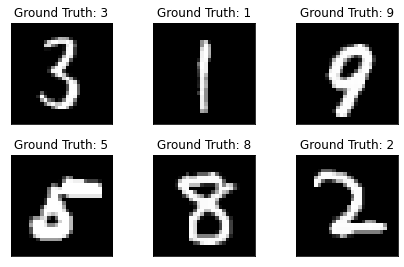

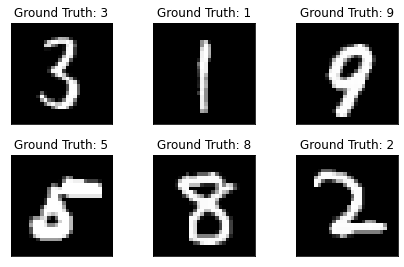

In [47]:
import matplotlib.pyplot as plt

examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [29]:
num_epochs = 10
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(num_epochs + 1)]

for epoch in range(num_epochs):
  losses = list()
  accuracies = list()
  for batch in train_loader:
    x, y = batch 
    b = x.size(0)
    x = x.view(b, -1)
    #1. forward
    l = model(x)
    #2. compute the objective function
    J = loss(l, y)
    #3. cleaning the gradients
    model.zero_grad()
    #4. backward
    J.backward()
    optimizer.step()

    losses.append(J.item())
    accuracies.append(y.eq(l.detach().argmax(dim=1)).float().mean())
    train_losses.append(J.item())
    train_counter.append(
        (batch*64) + ((epoch-1)*len(train_loader.dataset)))

  print(f'Epoch {epoch+1}, train loss: {torch.tensor(losses).mean():.2f}, train accuracy: {torch.tensor(accuracies).mean():.2f}')
  losses =  list()
  accuracies = list()
  for batch in val_loader:
    x, y = batch
    b = x.size(0)
    x = x.view(b, -1)

    with torch.no_grad():
      l = model(x)
    J = loss(l, y)

    losses.append(J.item())
    accuracies.append(y.eq(l.detach().argmax(dim=1)).float().mean())
    
  
  print(f'Epoch {epoch + 1}, validation loss: {torch.tensor(losses).mean():.2f}, vallidation accuracy: {torch.tensor(accuracies).mean():.2f}')


Epoch 1, train loss: 1.23, train accuracy: 0.65
Epoch 1, validation loss: 0.53, vallidation accuracy: 0.84
Epoch 2, train loss: 0.45, train accuracy: 0.87
Epoch 2, validation loss: 0.39, vallidation accuracy: 0.89
Epoch 3, train loss: 0.36, train accuracy: 0.90
Epoch 3, validation loss: 0.34, vallidation accuracy: 0.91
Epoch 4, train loss: 0.32, train accuracy: 0.91
Epoch 4, validation loss: 0.31, vallidation accuracy: 0.91
Epoch 5, train loss: 0.28, train accuracy: 0.92
Epoch 5, validation loss: 0.28, vallidation accuracy: 0.92
Epoch 6, train loss: 0.26, train accuracy: 0.93
Epoch 6, validation loss: 0.26, vallidation accuracy: 0.93
Epoch 7, train loss: 0.23, train accuracy: 0.93
Epoch 7, validation loss: 0.24, vallidation accuracy: 0.93
Epoch 8, train loss: 0.21, train accuracy: 0.94
Epoch 8, validation loss: 0.22, vallidation accuracy: 0.94
Epoch 9, train loss: 0.20, train accuracy: 0.94
Epoch 9, validation loss: 0.20, vallidation accuracy: 0.94
Epoch 10, train loss: 0.18, train acc

In [ ]:
fig = plt.figure()

#plot loss learning curve
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [70]:
with torch.no_grad():
  output = model(example_data.view(32, 1, 784))

In [115]:
example_data.data

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

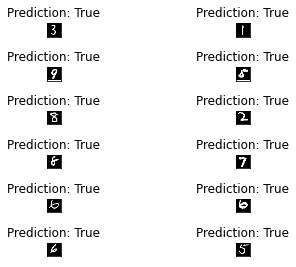

In [126]:
fig = plt.figure()
for i in range(12):
  plt.subplot(6,2,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data[i].max(1, keepdim=True)[1].item() == example_targets[i]))
  plt.xticks([])
  plt.yticks([])
#fig

In [118]:
for i in range(32):
  if output.data[i].max(1, keepdim=True)[1].item() != example_targets[i]:
    print(i)

12
27


([], <a list of 0 Text major ticklabel objects>)

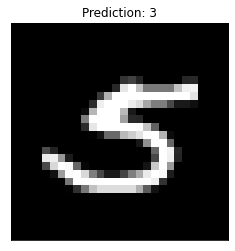

In [125]:
fig = plt.figure()
#plt.subplot(6,2,i+1)
#plt.tight_layout()
plt.imshow(example_data[27][0], cmap='gray', interpolation='none')
plt.title("Prediction: {}".format(
   output.data[27].max(1, keepdim=True)[1].item()))
plt.xticks([])
plt.yticks([])